In [1]:
using Random
using Plots
using GLMakie, Makie

### Visualisation of probabilistic model for Example 11.16 (Voter model)
#### from "Probability Theory: A comprehensive Course" 1st edition by Achim Klenke

In [2]:
fig = Figure()
L = 100
d = 2

neighbours = vec([[i, j] for i in -1:1, j in -1:1])
neighbours = neighbours[abs.(sum.(neighbours)) .== 1]

4-element Vector{Vector{Int64}}:
 [0, -1]
 [-1, 0]
 [1, 0]
 [0, 1]

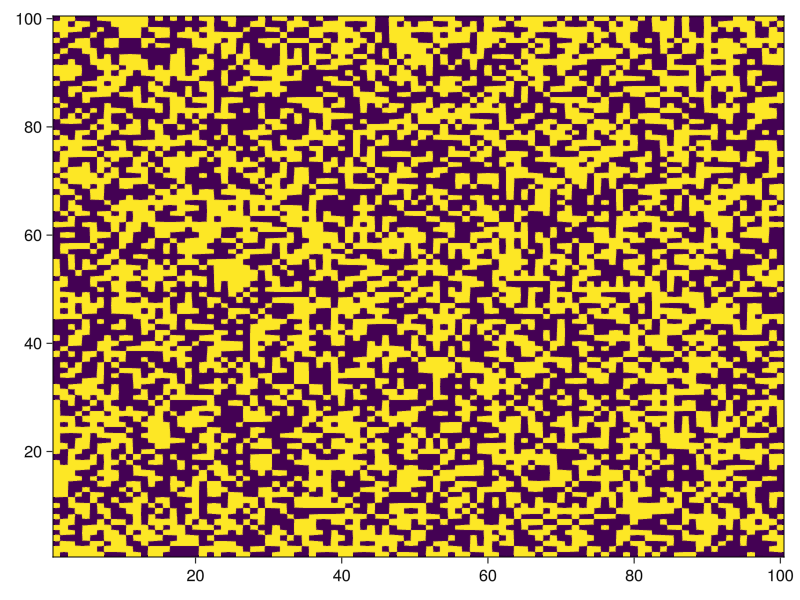

In [3]:
# initial X'ses
X = rand(0:1, (L, L)...)
M = [sum(X)]

GLMakie.heatmap(fig[1,1], X)
#GLMakie.scatter!(1:15, 1:15)
fig

In [4]:
record(fig, "simulation1.gif", framerate = 50, 1:500) do frame 
    neighbour = rand(neighbours)
    I = [rand(0:(L - 1)), rand(0:(L - 1))]
    NI = (I + neighbour) .% L
    # modular arithmetic without negative numbers
    NI[NI .< 0] = NI[NI .< 0] .+ L

    # correction for julia enumerating from 1 not 0
    X[(I .+ [1, 1])...] = X[(NI .+ [1, 1])...]
    push!(M, sum(X))
    
    GLMakie.heatmap!(fig[1,1], X)
end

"simulation1.gif"